In [1]:
!git clone https://github.com/ml-ninja/Data_Driven_Science_Python_Demos.git


Cloning into 'Data_Driven_Science_Python_Demos'...
remote: Enumerating objects: 278, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 278 (delta 40), reused 14 (delta 8), pack-reused 180
Receiving objects: 100% (278/278), 219.28 MiB | 38.72 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (121/121), done.


Shape of A:  (506, 14)
Shape of b:  (506,)


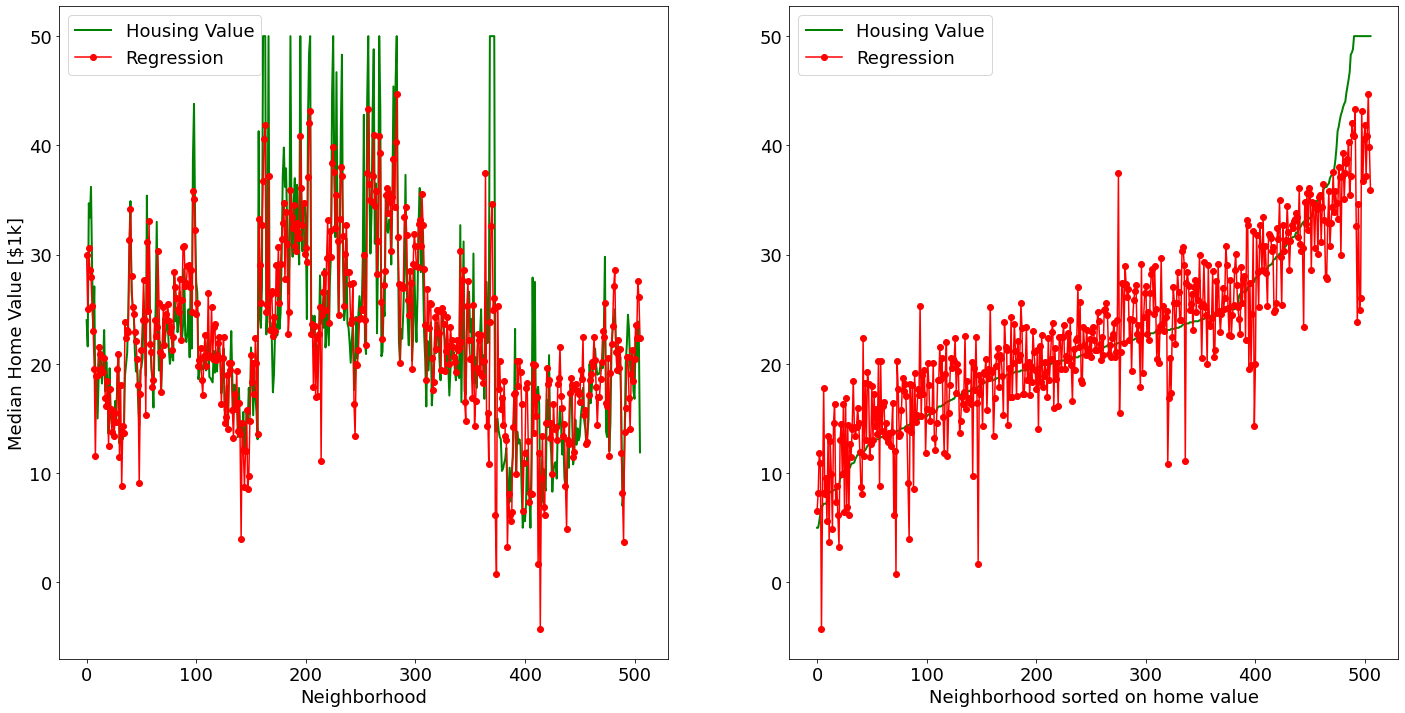

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [24, 12]
plt.rcParams.update({'font.size': 18})

# Load dataset
H = np.loadtxt(os.path.join('Data_Driven_Science_Python_Demos','DATA','housing.data'))
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # other factors

# Pad with ones for nonzero offset
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)

print('Shape of A: ', A.shape)
print('Shape of b: ', b.shape)

# Solve Ax=b using SVD
# Note that the book uses the Matlab-specific "regress" command
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, color='g', linewidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1]) # indexes sorted on price
plt.plot(b[sort_ind], color='g', linewidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood sorted on home value')
plt.legend()

plt.show()

Shape of A_mean (14,)
Shape of A_mean (14, 1)
[[3.61352356e+00]
 [1.13636364e+01]
 [1.11367787e+01]
 [6.91699605e-02]
 [5.54695059e-01]
 [6.28463439e+00]
 [6.85749012e+01]
 [3.79504269e+00]
 [9.54940711e+00]
 [4.08237154e+02]
 [1.84555336e+01]
 [3.56674032e+02]
 [1.26530632e+01]
 [1.00000000e+00]]
Shape of A2 (506, 14)


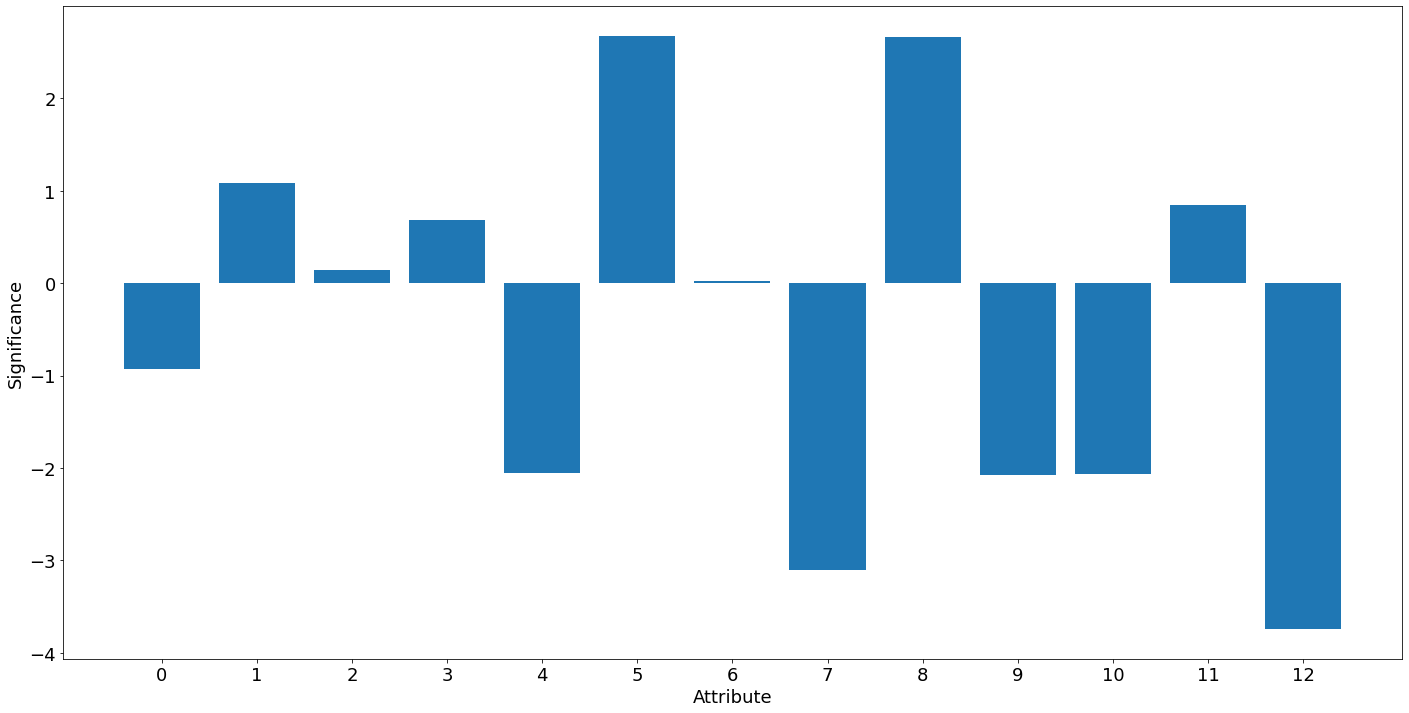

In [15]:
A_mean = np.mean(A,axis=0)
print('Shape of A_mean', A_mean.shape)
A_mean = A_mean.reshape(-1, 1)
print('Shape of A_mean', A_mean.shape)
print(A_mean)

# A2 = A - np.ones((A.shape[0],1)) @ A_mean.T
# A more concise way of doing the above:
A2 = A - A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std
    
# A2[:,-1] = np.ones(A.shape[0])
# A more concise way of doing the above:
A2[:,-1] = 1
print('Shape of A2', A2.shape)

U, S, VT = np.linalg.svd(A2,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
# x_tick = range(len(x)-1)+np.ones(len(x)-1)
x_tick = range(len(x)-1)

plt.bar(x_tick,x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()
